In [1]:
import os
import scipy
import numpy as np
import matplotlib.pyplot as plt
import obspy
import pickle
from obspy import UTCDateTime
from obspy.clients.fdsn import Client
import util
import pandas as pd

In [4]:
root = '/home/earthquakes1/homes/Rebecca/phd/data/2019_global_m3/' 

In [40]:
iv2 = pd.read_pickle(root+'iv2_dataframe.pkl')
with open(root+'list_iv2', "rb") as fp:   #Pickling
    list_iv2 = np.array(pickle.load(fp))
with open(root+'list_mag', "rb") as fp:   #Pickling
    list_mag = np.array(pickle.load(fp))
with open(root+'list_dist', "rb") as fp:   #Pickling
    list_dist = np.array(pickle.load(fp) )

In [41]:
dist_corr_mult = (np.array(list_dist)**2)*np.array(list_iv2)

In [42]:
import pandas as pd
df  = pd.DataFrame({'iv2':np.log10(dist_corr_mult), 'mag':list_mag, 'dist':list_dist})
df

,iv2,mag,dist
0,-5.093182,4.20,98.555086
1,-4.472623,4.20,80.209169
2,-4.929952,4.20,40.867473
3,-2.698507,4.10,21.474107
4,-6.431858,3.00,151.668414
...,...,...,...
26756,-5.489348,3.53,147.476875
26757,-5.262567,3.53,120.486105
26758,-5.545909,3.53,48.165022
26759,-7.267612,3.53,76.446475


In [93]:
df.drop(df[df.iv2 < -13].index, inplace=True)
df.drop(df[df.iv2 > 3].index, inplace=True)

In [44]:
df

,iv2,mag,dist
0,-5.093182,4.20,98.555086
1,-4.472623,4.20,80.209169
2,-4.929952,4.20,40.867473
3,-2.698507,4.10,21.474107
4,-6.431858,3.00,151.668414
...,...,...,...
26756,-5.489348,3.53,147.476875
26757,-5.262567,3.53,120.486105
26758,-5.545909,3.53,48.165022
26759,-7.267612,3.53,76.446475


In [51]:
np.array(x)+np.random.uniform(-0.05, 0.05, len(x))

array([-0.80237523, -0.75767268, -0.80519523, ..., -1.46565867,
       -1.43808781, -1.42302612])

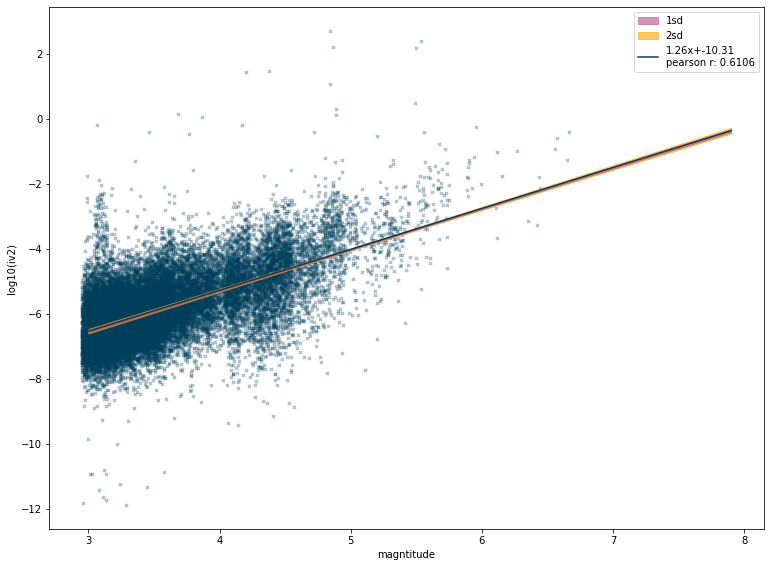

In [109]:
fig, axs = plt.subplots(1,1, figsize=(12.8,9.6))

x = np.array(df['mag'])-5
y = df['iv2']
x_unique = np.arange(-2,3,0.1)
#axs.scatter(x, y,  c = df['dist'], cmap = 'viridis')
axs.scatter(x+np.random.uniform(-0.05, 0.05, len(x)), y, s = 10, c = '#003f5c', marker = 'x', alpha = 0.3)
result = scipy.stats.linregress(x,y)
a = result.slope
b = result.intercept
std_a = result.stderr
std_b = result.intercept_stderr

y_1 = (a+std_a)*x_unique + (b+std_b)
y_2 = (a+std_a)*x_unique + (b-std_b)
y_3 = (a-std_a)*x_unique + (b+std_b)
y_4 = (a-std_a)*x_unique + (b-std_b)


y_min_1sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_1sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))

y_1 = (a+2*std_a)*x_unique + (b+2*std_b)
y_2 = (a+2*std_a)*x_unique + (b-2*std_b)
y_3 = (a-2*std_a)*x_unique + (b+2*std_b)
y_4 = (a-2*std_a)*x_unique + (b-2*std_b)

y_min_2sd = np.minimum(np.minimum(y_1, y_2), np.minimum(y_3, y_4))
y_max_2sd = np.maximum(np.maximum(y_1, y_2), np.maximum(y_3, y_4))        

#plt.scatter(x+np.random.uniform(-0.05, 0.05, len(x)),y, marker = 'x', color = 'k', s = 10, alpha = 0.5)
axs.fill_between(x_unique, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
axs.fill_between(x_unique, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')

axs.plot(x_unique, a*x_unique+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept-5*result.slope,r=result.rvalue))
plt.ylabel('log10(iv2)')
plt.xlabel('magntitude')
#plt.colorbar(label = 'distance') 
axs.set_xticks([-2,-1,0,1,2,3], [3,4,5,6,7,8], zorder = 110)
axs.legend()
#081839

In [113]:
x_hist = np.array(x)+5
y_hist = 10**np.array(y)

/tmp/ipykernel_1974556/3021062880.py:10: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(H), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], np.log10(yedges[0]), np.log10(yedges[-1])], aspect = 0.5, cmap = 'inferno', vmin = np.log10(0.5))


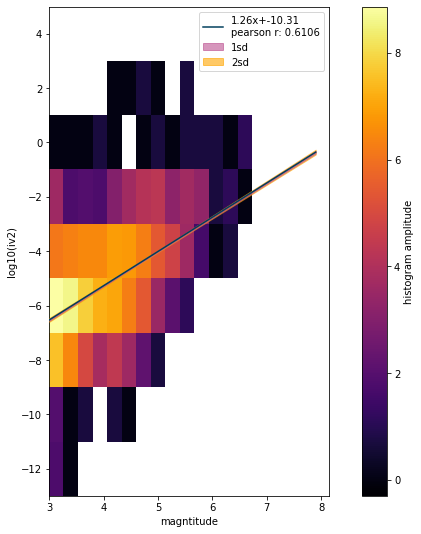

In [118]:
#fig, axs = plt.subplots())
#ax = fig.add_subplots( title='imshow: square bins')
plt.figure(figsize=(12,9))
y_limits = np.logspace(-13, 5, 10)
x_limits = np.linspace(3, 7, 16)
H, xedges, yedges = np.histogram2d(list(x_hist), list(y_hist),  bins=[x_limits, y_limits])
H = H.T
#plt.scatter(list_mag, np.log10(dist_corr_mult),  c = list_dist, cmap = 'viridis')
#ax = fig.add_subplot(111, title='imshow: square bins')
plt.imshow(np.log(H), interpolation='nearest', origin='lower', extent=[xedges[0], xedges[-1], np.log10(yedges[0]), np.log10(yedges[-1])], aspect = 0.5, cmap = 'inferno', vmin = np.log10(0.5))
plt.colorbar(label = 'histogram amplitude')
#X, Y = np.meshgrid(xedges[:-1], yedges[:-1])
#ax.pcolormesh(X, Y, H)
plt.ylabel('log10(iv2)')
plt.xlabel('magntitude')
#plt.ylim([-10,2])
plt.plot(x_unique+5, a*x_unique+b, color='#003f5c',zorder=102,label='{a:.2f}x+{b:.2f}\npearson r: {r:.4f}'.format(a=result.slope,b=result.intercept-5*result.slope,r=result.rvalue))
plt.fill_between(x_unique+5, y_min_1sd, y_max_1sd, color = '#bc5090', alpha = 0.6, zorder = 100, label = '1sd')
plt.fill_between(x_unique+5, y_min_2sd, y_max_2sd, color = '#ffa600', alpha = 0.6, zorder = 99, label = '2sd')
plt.legend()
#initial_guess = (1.4,0)
#res = optimize.minimize(obj, initial_guess, method = 'Nelder-mead')
#x_plot = np.linspace(min(list_mag), max(list_mag), 20)-5
#y_plot = a * x_plot + b
#plt.plot(x_plot,y_plot, label = str(a) + '*x+'+ str(b))
#plt.scatter(np.arange(3, 6.8, 0.1), np.log10(mag_bin_medians), marker = 'x', color = 'silver')
#plt.vlines(res.x[0], 0 , 4, color='tab:blue', label = 'optimize.minimize all data, 1-norm')
#plt.legend()
#plt.title('log10(iv2) referenced to 1km by multiplying by distance^2')
#plt.ylim([-10, 2])
#plt.xscale('log')